# 1. Analysing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('diabetes.csv')

In [2]:
missing_values={}
print('Dataset Columns:')
for column in data:
    missing_values[column]=0
    if column=='Outcome':
        print(' ',column)
    else:
        print(' ',column ,end=',')
if 'Outcome' in missing_values:
    del missing_values['Outcome']

Dataset Columns:
  Pregnancies,  Glucose,  BloodPressure,  SkinThickness,  Insulin,  BMI,  DiabetesPedigreeFunction,  Age,  Outcome


Total Outcomes: 767
Positive Outcomes(Diabetes): 499
Negative Outcomes(No Diabetes): 268


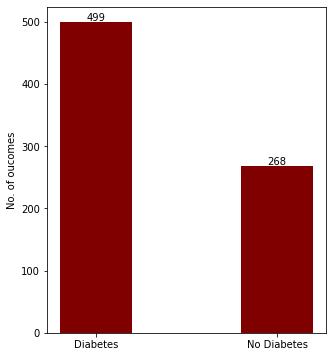

In [3]:
pos = data['Outcome'].value_counts()[0]
neg = data['Outcome'].value_counts()[1]

print('Total Outcomes:',data['Outcome'].count())
print('Positive Outcomes(Diabetes):',pos)
print('Negative Outcomes(No Diabetes):',neg)

outcome = ['Diabetes', 'No Diabetes']
values = [pos,neg]

fig = plt.figure(figsize = (5, 6))
plt.bar(outcome, values, color ='maroon', width = 0.4)
plt.text(0,pos+3,pos,ha="center")
plt.text(1,neg+3,neg,ha="center")
plt.ylabel("No. of oucomes")
plt.show()

Effect of No. of Pregnancies on Diabetes


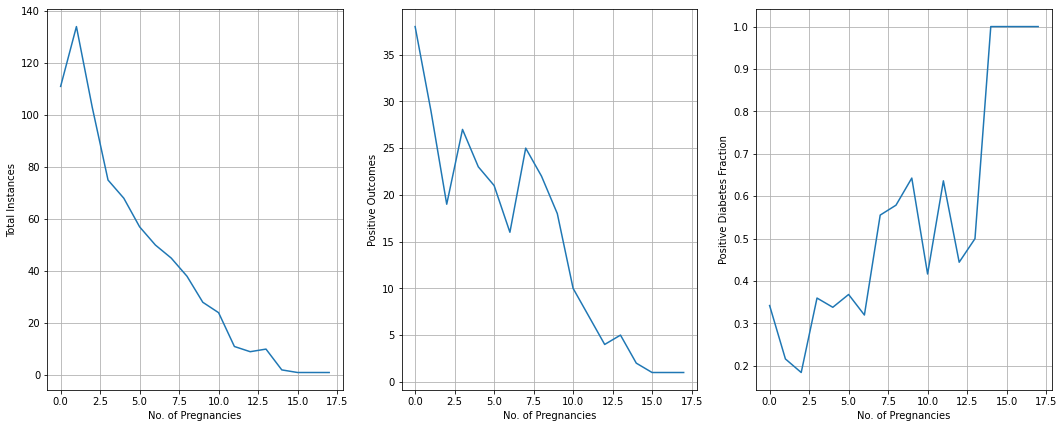

In [4]:
list = []
for i in data['Pregnancies']:
    if i not in list:
        list.append(i)
list.sort()
total_instances = []
for i in list:
    total_instances.append(data['Pregnancies'].value_counts()[i])
positive_instances = []
for i in list:
    positive_instances.append(data['Pregnancies'][data['Outcome']==1].value_counts()[i])
print('Effect of No. of Pregnancies on Diabetes')
fig = plt.figure(figsize = (18, 7))
plt.subplot(1, 3, 1)
plt.xlabel('No. of Pregnancies')
plt.ylabel('Total Instances')
plt.plot(list, total_instances)
plt.grid()
plt.subplot(1, 3, 2)
plt.xlabel('No. of Pregnancies')
plt.ylabel('Positive Outcomes')
plt.plot(list, positive_instances)
plt.grid()
plt.subplot(1, 3, 3)
positive_fraction = []
for i in range(len(list)):
    positive_fraction.append(positive_instances[i]/total_instances[i])
plt.xlabel('No. of Pregnancies')
plt.ylabel('Positive Diabetes Fraction')
plt.plot(list, positive_fraction)
plt.grid()
plt.show()

Effect of Glucose on Diabetes


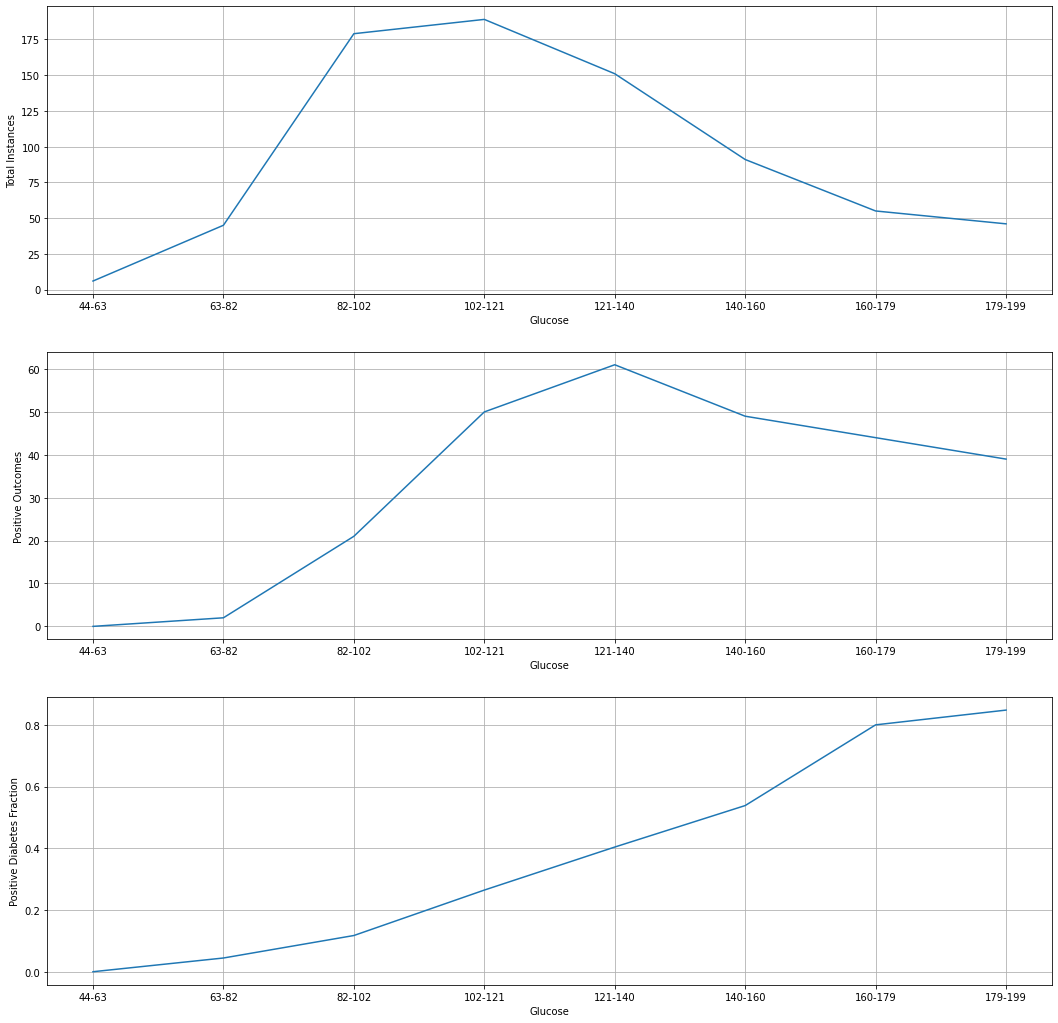

Effect of BloodPressure on Diabetes


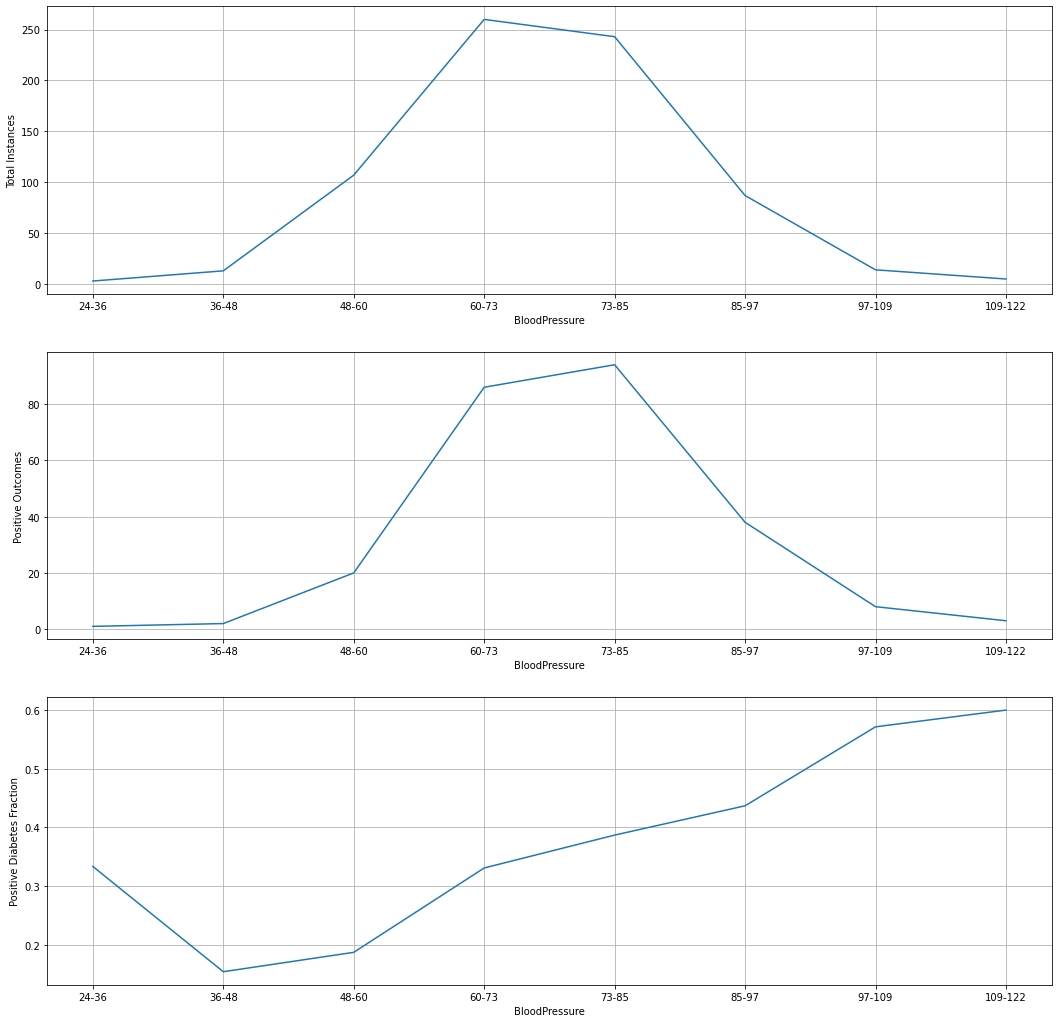

Effect of SkinThickness on Diabetes


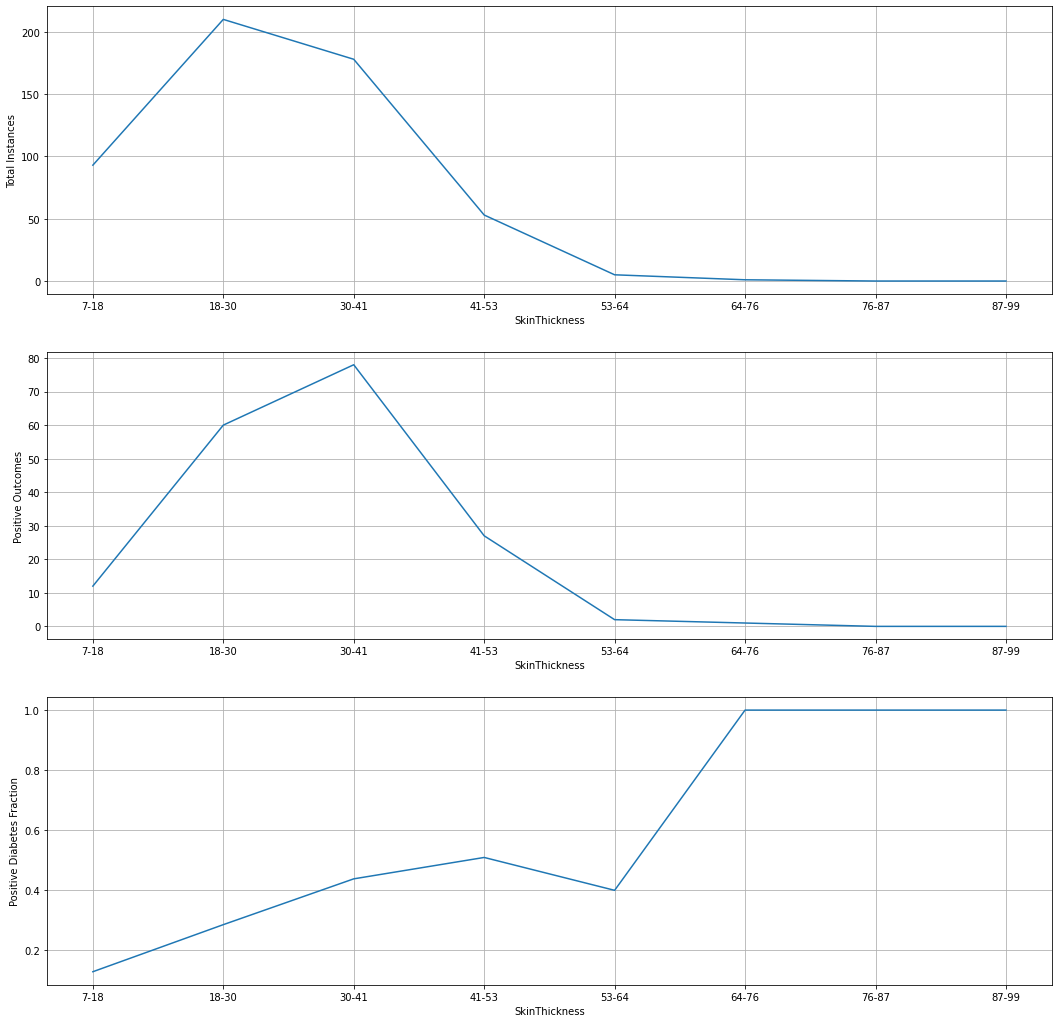

Effect of Insulin on Diabetes


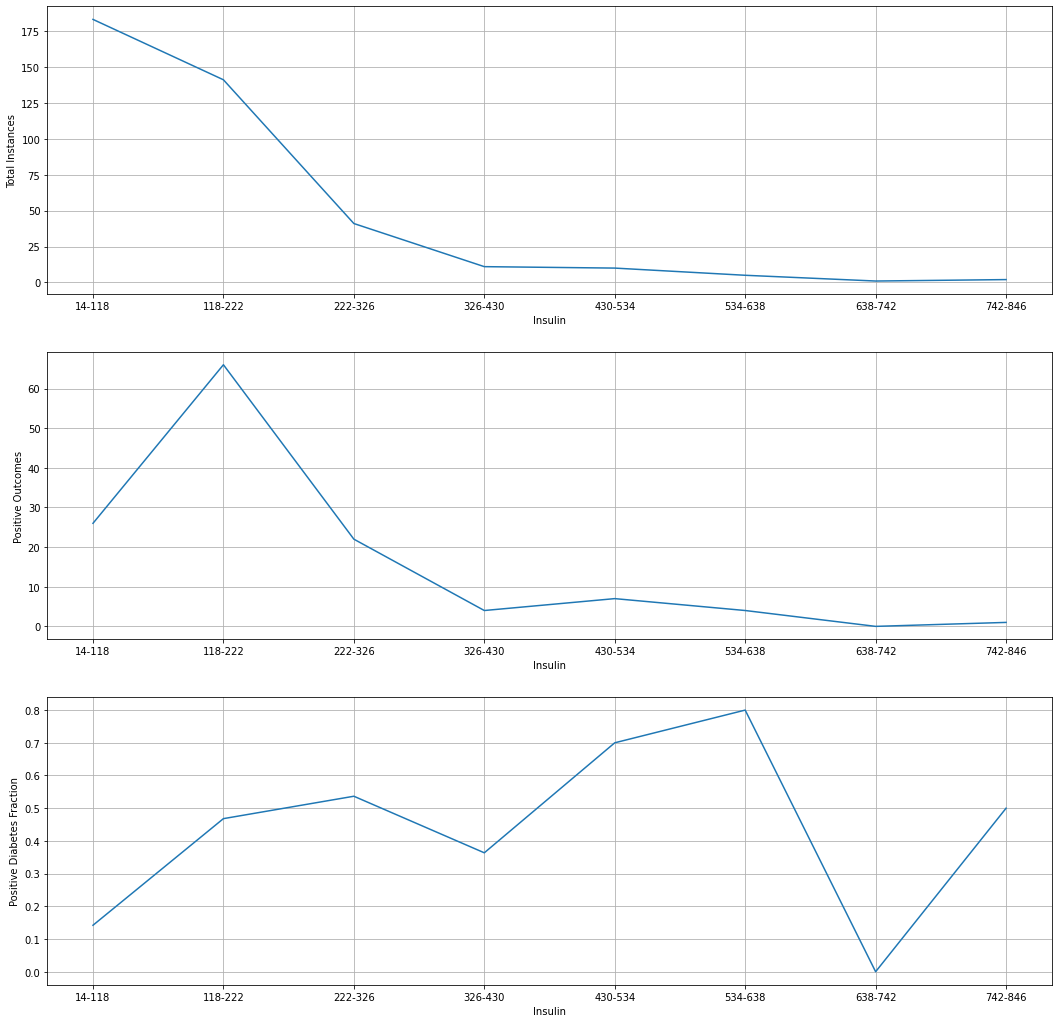

Effect of Age on Diabetes


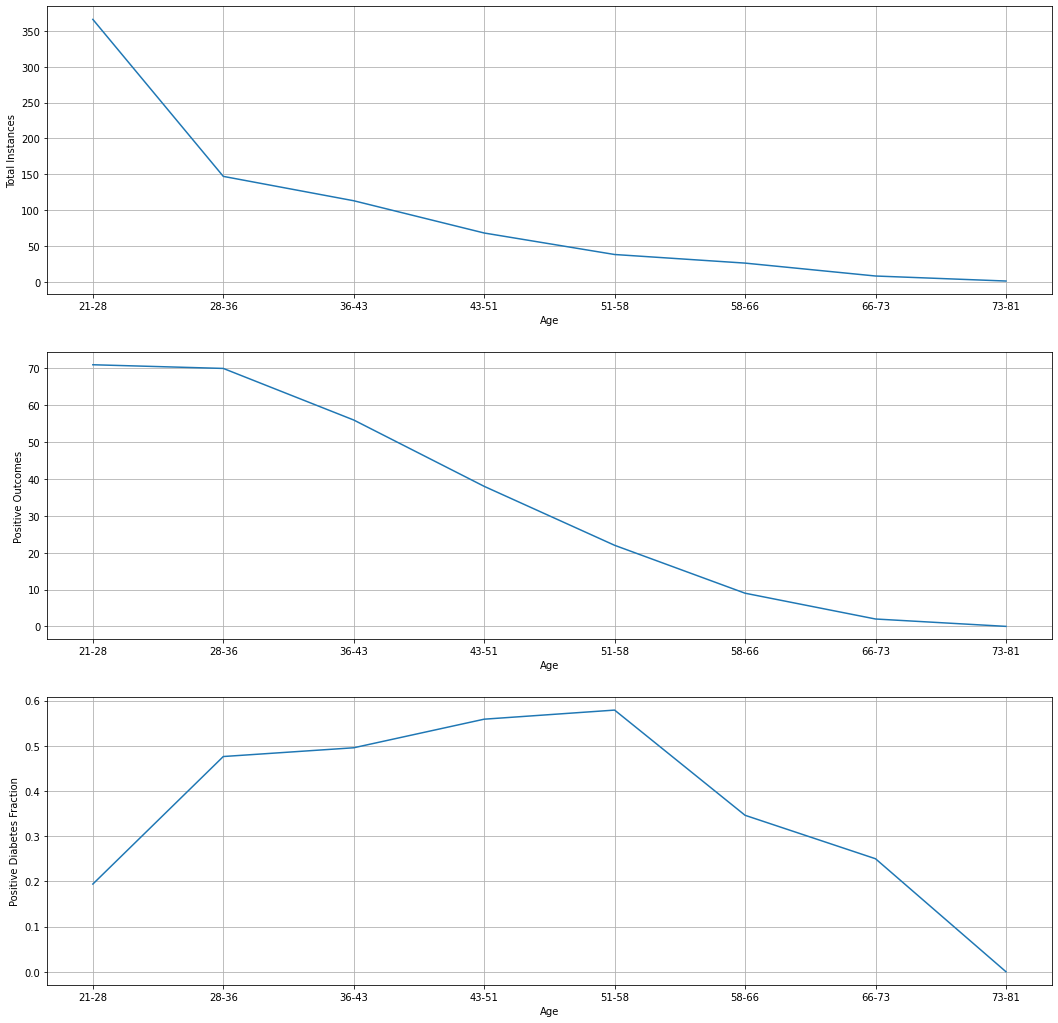

In [5]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','Age']
for column in cols:
    list = []
    for i in data[column]:
        if i==0:
            missing_values[column]+=1
        if i not in list:
            list.append(i)
    if 0 in list:
        list.remove(0)
    list.sort()
    pos=[]
    min_glu = min(list)
    x = min_glu
    max_glu = max(list)
    division = (max_glu-min_glu)/8

    division_list = []
    while min_glu!=max_glu:
        min_glu += division
        division_list.append(min_glu)
    range_list = []
    range_list.append(str(x)+'-'+str(int(division_list[0])))
    for i in range(1,len(division_list)):
        range_list.append(str(int(division_list[i-1]))+'-'+str(int(division_list[i])))
    for i in (data[column][data['Outcome']==1]):
        if i not in pos:
            pos.append(i)
    if 0 in pos:
        pos.remove(0)
    positive_instance = [0]*len(division_list)

    total_instance = [0]*len(division_list)

    index = 0
    for i in list:
        if i<=division_list[index]:
            total_instance[index]+=(data[column].value_counts()[i])
        else:
            index+=1
            total_instance[index]+=(data[column].value_counts()[i])
    index = 0
    for i in list:
        if i<=division_list[index]:
            if i in pos:
                positive_instance[index]+=(data[column][data['Outcome']==1].value_counts()[i])
        else:
            index+=1
            if i in pos:
                positive_instance[index]+=(data[column][data['Outcome']==1].value_counts()[i])
    positive_fraction = []
    for i in range(len(total_instance)):
        if total_instance[i] == positive_instance[i]:
            positive_fraction.append(1)
        else:
            positive_fraction.append(positive_instance[i]/total_instance[i])

    print('Effect of',column,'on Diabetes')
    fig = plt.figure(figsize = (18, 18))
    plt.subplot(3, 1, 1)
    plt.xlabel(column)
    plt.ylabel('Total Instances')
    plt.plot(range_list, total_instance)
    plt.grid()
    plt.subplot(3, 1, 2)
    plt.xlabel(column)
    plt.ylabel('Positive Outcomes')
    plt.plot(range_list, positive_instance)
    plt.grid()
    plt.subplot(3, 1, 3)
    plt.xlabel(column)
    plt.ylabel('Positive Diabetes Fraction')
    plt.plot(range_list, positive_fraction)
    plt.grid()
    plt.show()

Effect of BMI level on Diabetes


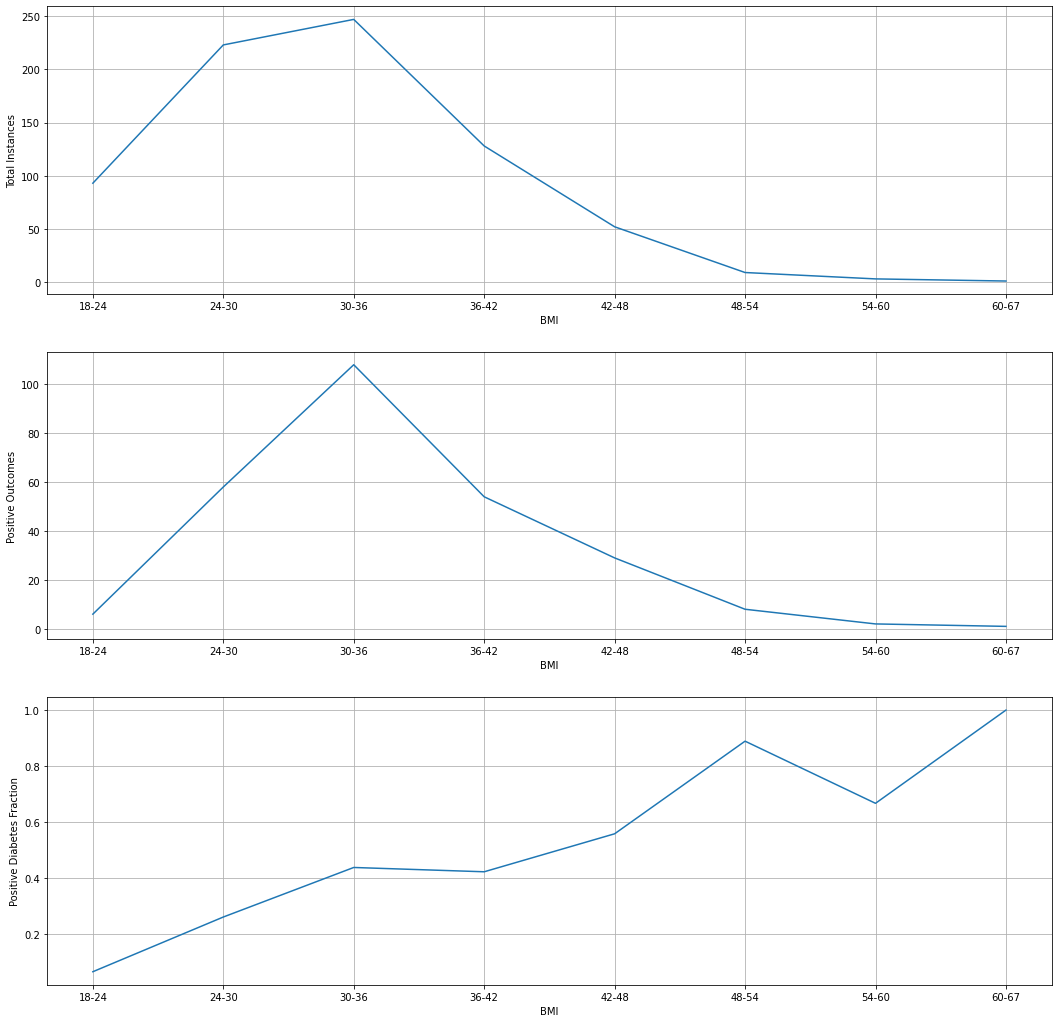

In [6]:
dict_total = {}
dict_positive = {}
index = 0
for i in data['BMI']:
    i1 = round(i)
    if i1 in dict_total:
        dict_total[i1]+=1
    else:
        dict_total[i1]=1
    if data['Outcome'][index]==1:
        if i1 in dict_positive:
            dict_positive[i1]+=1
        else:
            dict_positive[i1]=1
    index+=1
missing_values['BMI']+=dict_total[0]
del dict_total[0]
del dict_positive[0]
max_BMI = max(dict_total.keys())
min_BMI = min(dict_total.keys())
x = min_BMI
dict_total = dict(sorted(dict_total.items()))
dict_positive = dict(sorted(dict_positive.items()))
division_list = []
for i in range(0,7):
    min_BMI+=6
    division_list.append(min_BMI)
division_list.append(max_BMI)
range_list = []
range_list.append(str(x)+'-'+str(division_list[0]))
for i in range(1,len(division_list)):
    range_list.append(str(division_list[i-1])+'-'+str(division_list[i]))
total_instance = [0]*len(division_list)
positive_instance = [0]*len(division_list)
index = 0
for i in dict_total:
    if i<=division_list[index]:
        total_instance[index]+=dict_total[i]
    else:
        index+=1
        total_instance[index]+=dict_total[i]
index = 0
for i in dict_positive:
    if i<=division_list[index]:
        positive_instance[index]+=dict_positive[i]
    else:
        index+=1
        positive_instance[index]+=dict_positive[i]

positive_fraction = []
for i in range(len(total_instance)):
    positive_fraction.append(positive_instance[i]/total_instance[i])

print('Effect of BMI level on Diabetes')
fig = plt.figure(figsize = (18, 18))
plt.subplot(3, 1, 1)
plt.xlabel('BMI')
plt.ylabel('Total Instances')
plt.plot(range_list, total_instance)
plt.grid()
plt.subplot(3, 1, 2)
plt.xlabel('BMI')
plt.ylabel('Positive Outcomes')
plt.plot(range_list, positive_instance)
plt.grid()
plt.subplot(3, 1, 3)
plt.xlabel('BMI')
plt.ylabel('Positive Diabetes Fraction')
plt.plot(range_list, positive_fraction)
plt.grid()
plt.show()

Effect of Diabetes Pedigree Function level on Diabetes


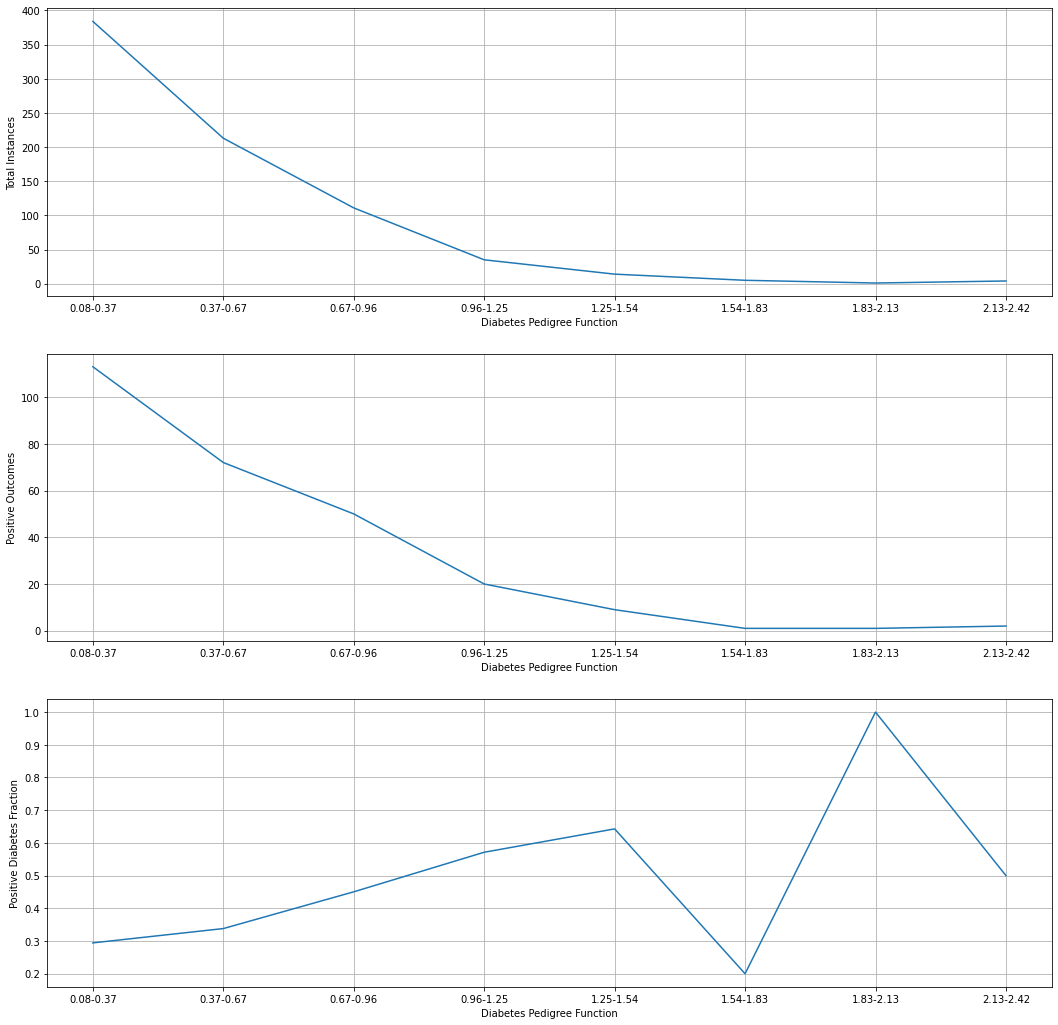

In [7]:
dict_total={}
dict_positive={}
index = 0
for i in data['DiabetesPedigreeFunction']:
    val = round(i,2)
    if val in dict_total:
        dict_total[val]+=1
    else:
        dict_total[val] = 1
    if data['Outcome'][index]==1:
        if val in dict_positive:
            dict_positive[val]+=1
        else:
            dict_positive[val]=1
    index+=1
        
dict_total = dict(sorted(dict_total.items())) 
dict_positive = dict(sorted(dict_positive.items())) 
# print(dict_total,'\n')
# print(dict_positive)
# print(len(dict_total))

min_DPF = min(dict_total.keys())
x = min_DPF
max_DPF = max(dict_total.keys())
division = (max_DPF-min_DPF)/8

division_list = []
while min_DPF!=max_DPF:
    min_DPF += division
    division_list.append(min_DPF)
range_list = []
range_list.append(str(x)+'-'+str(round(division_list[0],2)))
for i in range(1,len(division_list)):
    range_list.append(str(round(division_list[i-1],2))+'-'+str(round(division_list[i],2)))
    
# print(x,max_DPF,division_list,range_list)

total_instance = [0]*len(division_list)
positive_instance = [0]*len(division_list)
index = 0
for i in dict_total:
    if i<=division_list[index]:
        total_instance[index]+=dict_total[i]
    else:
        index+=1
        total_instance[index]+=dict_total[i]
index = 0
for i in dict_positive:
    if i<=division_list[index]:
        positive_instance[index]+=dict_positive[i]
    else:
        index+=1
        positive_instance[index]+=dict_positive[i]

positive_fraction = []
for i in range(len(total_instance)):
    positive_fraction.append(positive_instance[i]/total_instance[i])

print('Effect of Diabetes Pedigree Function level on Diabetes')
fig = plt.figure(figsize = (18, 18))
plt.subplot(3, 1, 1)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Total Instances')
plt.plot(range_list, total_instance)
plt.grid()
plt.subplot(3, 1, 2)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Positive Outcomes')
plt.plot(range_list, positive_instance)
plt.grid()
plt.subplot(3, 1, 3)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Positive Diabetes Fraction')
plt.plot(range_list, positive_fraction)
plt.grid()
plt.show()

# 2. Missing Values

Missing values comaparision of columns


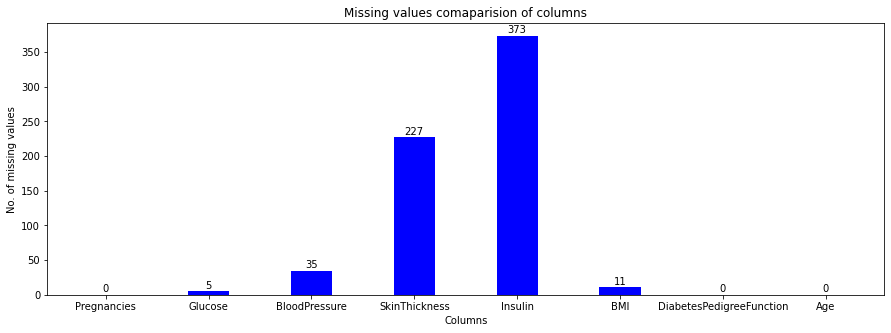

In [8]:
print('Missing values comaparision of columns')
columns = missing_values.keys()
values = missing_values.values()
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(columns, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Columns")
plt.ylabel("No. of missing values")
index=0
for i in missing_values:
    plt.text(index,missing_values[i]+4,missing_values[i], ha="center")
    index+=1
plt.title("Missing values comaparision of columns")
plt.show()

* For a normal human
    * Glucose level, Blood Pressure, Skin Thickness, BMI can not be zero for a living human
    * Insulin can be zero in very rare cases
* but the no of rows where these values are zero
    * Glucose : 5
    * Blood Pressure : 35
    * Skin Thickness : 227
    * Insulin : 373
    * BMI : 11

# 3. Model Selection

In [9]:
data_columns = []
for i in data:
    data_columns.append(i)
if 'Outcome' in data_columns:
    data_columns.remove('Outcome')
print(data_columns)

X = data[data_columns]
Y = data.Outcome

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {}

models['KNN'] = KNeighborsClassifier()
models['SVC'] = SVC(probability = True)
models['LR'] = LogisticRegression()
models['DT'] = DecisionTreeClassifier()
models['GNB'] = GaussianNB()
models['RF'] = RandomForestClassifier()
models['GB'] = GradientBoostingClassifier()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=0.2)

accuracy_scores = {}
for i in models:
    model = models[i]
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    accuracy_scores[i] = accuracy_score(Y_test, Y_pred)
print(accuracy_scores)

{'KNN': 0.7467532467532467, 'SVC': 0.7792207792207793, 'LR': 0.8246753246753247, 'DT': 0.6818181818181818, 'GNB': 0.8116883116883117, 'RF': 0.7922077922077922, 'GB': 0.8116883116883117}


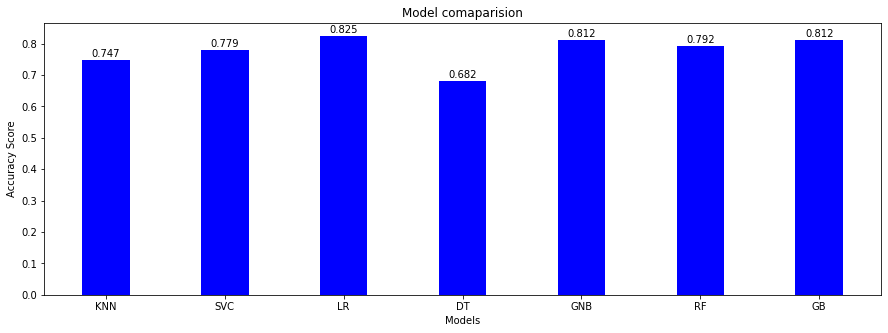

In [15]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color ='blue',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
index=0
for i in accuracy_scores:
    plt.text(index,accuracy_scores[i]+0.01,round(accuracy_scores[i],3), ha="center")
    index+=1
plt.title("Model comaparision")
plt.show()

From the above graph we can see logostic regression performs best for our data, so we will be selecting Logistic regression

In [16]:
import joblib

for i in models:
    joblib.dump(models[i],'pickle/'+i+'.pkl')

In [17]:
x = pd.DataFrame([[2,148,72,35,0,33.6,0.627,50]], columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
for i in models:
    predictor = joblib.load('pickle/'+i+'.pkl')
    prediction = predictor.predict_proba(x)
    if prediction[0][1]>0.5:
        print(i,'prediction:',round(prediction[0][1]*100,2),'% positive')
    else:
        print(i,'prediction:',round(prediction[0][0]*100,2),'% negative')
#     print(i,'prediction:',prediction[0][1]prediction[0][1])

KNN prediction: 60.0 % negative
SVC prediction: 58.01 % positive
LR prediction: 63.03 % positive
DT prediction: 100.0 % positive
GNB prediction: 53.96 % positive
RF prediction: 81.0 % positive
GB prediction: 80.36 % positive
